In [64]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Get the file from the user's Google Drive
file_path = '/labeled_tweets_dataset.csv'

# Read the file into a pandas DataFrame
df = pd.read_csv(file_path, encoding='latin1')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
print(df)

       Unnamed: 0              user  \
0               0    @ahmadwaraichh   
1               1  @W97537438Denise   
2               2     @nair_nandu08   
3               3          @Byron47   
4               4   @Period65995738   
...           ...               ...   
11221       11221      @binaratmaja   
11222       11222  @Chic_AvantGarde   
11223       11223     @GeorgeProust   
11224       11224       @GemYardBTC   
11225       11225  @DivisiveContent   

                                                   tweet  \
0      Former minister in Shahbaz Sharif's cabinet, w...   
1      No we have a catastrophe in our House! It wasn...   
2      This man @AbhishekJa98788  is using my dp and ...   
3      Inside Elon Musk's Neuralink lab where 1,500 a...   
4      An apology isn't accountability.   He broke th...   
...                                                  ...   
11221  elonmusk: @Culture_Crit What a crazy thing for...   
11222  I'll start a thread posting the spam account

In [66]:
# Replace the sentiment strings with numerical codes
sentiment_mapping = {'neutral': 0, 'positive': 2, 'negative': 1}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)


In [67]:
print(df)

       Unnamed: 0              user  \
0               0    @ahmadwaraichh   
1               1  @W97537438Denise   
2               2     @nair_nandu08   
3               3          @Byron47   
4               4   @Period65995738   
...           ...               ...   
11221       11221      @binaratmaja   
11222       11222  @Chic_AvantGarde   
11223       11223     @GeorgeProust   
11224       11224       @GemYardBTC   
11225       11225  @DivisiveContent   

                                                   tweet  \
0      Former minister in Shahbaz Sharif's cabinet, w...   
1      No we have a catastrophe in our House! It wasn...   
2      This man @AbhishekJa98788  is using my dp and ...   
3      Inside Elon Musk's Neuralink lab where 1,500 a...   
4      An apology isn't accountability.   He broke th...   
...                                                  ...   
11221  elonmusk: @Culture_Crit What a crazy thing for...   
11222  I'll start a thread posting the spam account

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11226 entries, 0 to 11225
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          11226 non-null  int64 
 1   user                11226 non-null  object
 2   tweet               10855 non-null  object
 3   preprocessed_tweet  10318 non-null  object
 4   sentiment           11226 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 438.6+ KB


In [69]:
df = df[['preprocessed_tweet','sentiment']]

In [70]:
df


,preprocessed_tweet,sentiment
0,former minister shahbaz sharif cabinet pledged...,0
1,catastrophe house border life america american...,1
2,man abhishekja98788 using dp name elonmusk twi...,0
3,inside elon musk neuralink lab animal killed t...,1
4,apology accountability broke law,0
...,...,...
11221,elonmusk crazy thing say,1
11222,start thread posting spam account blocked cait...,0
11223,lot easier rely traitorous elon musk,0
11224,elonmusk groq grok,0


In [71]:
text_len = []
for text in df.preprocessed_tweet:
    if isinstance(text, str):  # Check if the value is a string
        tweet_len = len(text.split())
        text_len.append(tweet_len)
    else:
        text_len.append(0)  # Or handle the NaN/float case as needed, e.g., append 0 or None


In [72]:
df['text_len'] = text_len

In [73]:
text_len

[25,
 14,
 11,
 12,
 4,
 0,
 48,
 15,
 3,
 15,
 3,
 3,
 1,
 1,
 36,
 5,
 184,
 17,
 28,
 13,
 1,
 9,
 8,
 6,
 5,
 77,
 6,
 0,
 26,
 8,
 5,
 37,
 26,
 0,
 20,
 9,
 23,
 22,
 4,
 19,
 9,
 14,
 20,
 1,
 2,
 1,
 24,
 53,
 11,
 0,
 27,
 19,
 27,
 23,
 23,
 16,
 9,
 10,
 0,
 2,
 2,
 11,
 0,
 6,
 4,
 15,
 25,
 17,
 13,
 0,
 16,
 9,
 8,
 27,
 2,
 17,
 3,
 3,
 8,
 9,
 27,
 9,
 0,
 5,
 19,
 9,
 0,
 2,
 25,
 3,
 3,
 12,
 20,
 20,
 7,
 5,
 3,
 5,
 0,
 33,
 43,
 16,
 18,
 30,
 25,
 19,
 5,
 6,
 25,
 1,
 3,
 27,
 21,
 19,
 1,
 0,
 4,
 2,
 16,
 15,
 2,
 6,
 2,
 40,
 0,
 44,
 2,
 9,
 27,
 2,
 1,
 5,
 4,
 19,
 6,
 34,
 3,
 4,
 15,
 9,
 7,
 19,
 10,
 10,
 13,
 19,
 9,
 2,
 6,
 5,
 1,
 4,
 5,
 12,
 5,
 14,
 6,
 12,
 4,
 14,
 38,
 18,
 18,
 13,
 0,
 111,
 2,
 32,
 8,
 12,
 22,
 7,
 16,
 17,
 4,
 2,
 3,
 8,
 4,
 4,
 4,
 8,
 14,
 9,
 20,
 18,
 7,
 22,
 3,
 4,
 1,
 21,
 19,
 23,
 2,
 1,
 18,
 4,
 0,
 3,
 22,
 20,
 2,
 7,
 3,
 0,
 2,
 6,
 8,
 2,
 2,
 8,
 7,
 2,
 24,
 17,
 3,
 31,
 9,
 18,
 20,
 1,
 2,
 22,
 3

In [74]:
text_len_test = []
for text in df.preprocessed_tweet:
    if isinstance(text, str):  # Check if the value is indeed a string
        tweet_len = len(text.split())
    else:
        tweet_len = 0  # Assign 0 or any appropriate value for non-string values
    text_len_test.append(tweet_len)


In [75]:
df['text_len'] = text_len_test

<ipython-input-76-137fc67924ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data=df[df['text_len']<40], palette='mako')


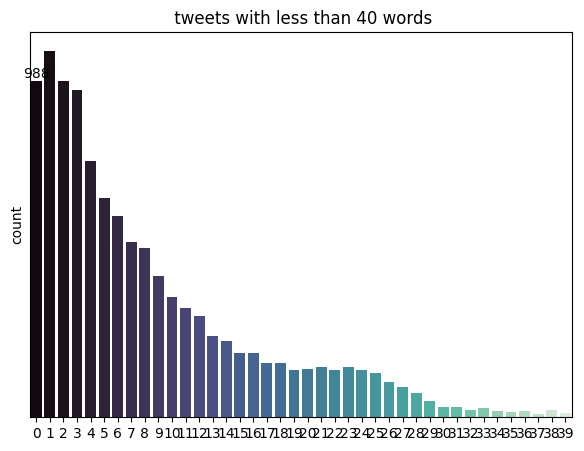

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your plotting code here
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<40], palette='mako')
plt.title(' tweets with less than 40 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [77]:
#As we can see, there are lots of cleaned tweets with 0 words: this is due to the cleaning performed before.
# This means that some tweets contained only mentions, hashtags and links, which have been removed. We will drop these empty tweets and also those with less than 5 words.

In [78]:
print(f" DF SHAPE: {df.shape}")


 DF SHAPE: (11226, 3)


In [79]:
df = df[df['text_len'] > 3]

In [80]:
print(f" DF SHAPE: {df.shape}")

 DF SHAPE: (7213, 3)


In [81]:
!pip install transformers

In [82]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [83]:
import numpy as np

In [84]:
token_lens = []

for txt in df['preprocessed_tweet'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [85]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 512


In [86]:
token_lens = []

for i,txt in enumerate(df['preprocessed_tweet'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 10, TEXT: judge kathaleen mccormick rescinded elon musk 55 billion tesla compensation package overturning company board 80 shareholder mccormick also ruled elonmusk twitter acquisition becoming head delaware chancery court mccormick worked delaware law firm called young conaway firm employee major donor president joe biden decade 2016 hunter biden hosted gubernatorial campaign event congressman john carney president joe biden guest speaker event took place law office young conaway wilmington delaware carney close friend joe biden last four decade later became governor nominated kathaleen mccormick partner young conaway position delaware chancery court march 2018 email hunter biden claimed personally know every judge delaware chancery court threatening legal action chinese business partner bring suit chancery court delaware know home state privileged worked know every judge chancery court elon musk purchased twitter stated goal restoring president biden called federal investigati

In [87]:
df['token_lens'] = token_lens

<ipython-input-87-b06175d1d9b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token_lens'] = token_lens


In [88]:
df = df.sort_values(by='token_lens', ascending=False)
df.head(20)

,preprocessed_tweet,sentiment,text_len,token_lens
420,delaware ruling elon musk 55b comp package big...,2,550,512
8549,want know happening elon musk company today go...,2,890,512
9555,musk anuncia primeiro implante chip neuralink ...,1,301,512
6542,probably doubt need evidence system john adam ...,2,494,512
5358,matteo gracis qualche giorno fa attraverso x o...,2,315,512
2735,regulamentao da big tech j est acontecendo com...,2,218,441
4434,ellon musk act move tesla legal base texas jud...,2,291,353
6310,horizon scan ep 32 musk renumeration v decel c...,1,265,335
1236,point think pro 1 tax benefit texas offer favo...,2,285,300
8746,palestine never existed independent state army...,2,279,296


In [89]:
df = df.iloc[12:]
df.head()

,preprocessed_tweet,sentiment,text_len,token_lens
5517,judge kathaleen mccormick rescinded elon musk ...,2,188,235
16,judge kathaleen mccormick rescinded elon musk ...,2,184,225
3157,delaware chancery court chief judge kathaleen ...,2,192,224
8374,terzaketv gaat het bij het hersenimplantaat va...,0,98,214
8270,circle 1 1 sovmichael 2 conceptualjames 3 jaco...,0,92,211


In [90]:
df = df.sample(frac=1).reset_index(drop=True)

In [91]:
df

,preprocessed_tweet,sentiment,text_len,token_lens
0,hayrdr olum uzayn tapusunu mu aldn amck elonmusk,0,8,24
1,tell black making everything race,1,5,7
2,making theory basis meme depression real dude ...,2,9,12
3,america big trouble understand people see wake...,1,10,12
4,national embarrassment sad as pathetic life ps...,1,12,16
...,...,...,...,...
7196,plastic surgeon destroyed face,0,4,6
7197,republican congress collaborating dems sneak b...,1,43,51
7198,way become 3rd world country karma,0,6,8
7199,slqq slaqq elonmusk presale gem,0,5,16


In [92]:
df_test= df.sample(frac=1).reset_index(drop=True)

In [93]:
df_test

,preprocessed_tweet,sentiment,text_len,token_lens
0,brace year getting wilder day,0,5,7
1,see elonmusk climategate decline explained ber...,0,10,16
2,yet people still believe elonmusk make starshi...,0,8,14
3,shrug nothing like booger smeared finger,0,6,9
4,bernard arnault overtakes elon musk richest pe...,2,11,21
...,...,...,...,...
7196,1990 mulayam singh yadav ordered police firing...,0,32,55
7197,elon musk neuralink brain chip tested human sc...,0,12,19
7198,come back like old post well new one wonder be...,1,10,12
7199,obviously watch video understand,0,4,6


In [94]:

df['sentiment'].value_counts()

2    2801
0    2735
1    1665
Name: sentiment, dtype: int64

In [95]:
X = df_test['preprocessed_tweet'].values
y = df_test['sentiment'].values

In [96]:
pip install imbalanced-learn


In [97]:
from imblearn.over_sampling import RandomOverSampler

# Now you can use RandomOverSampler
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['preprocessed_tweet']).reshape(-1, 1), np.array(df['sentiment']).reshape(-1, 1))
df_test = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns=['preprocessed_tweet', 'sentiment'])


In [98]:
from sklearn.model_selection import train_test_split

# Define a seed for reproducibility
seed = 42

# Now, use this seed in train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)



In [99]:
X_test = df['preprocessed_tweet'].values
y_test = df['sentiment'].values

In [100]:
y_test

array([0, 1, 2, ..., 0, 0, 0])

In [101]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [102]:
from sklearn import preprocessing

# Now you can use preprocessing.OneHotEncoder
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
# Assuming y_test is defined
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()


In [103]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 6480
VALIDATION DATA: 721
TESTING DATA: 7201


In [104]:
from sklearn.feature_extraction.text import CountVectorizer

# Now you can use CountVectorizer
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)


In [105]:
from sklearn.feature_extraction.text import TfidfTransformer

# Now you can use TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)


In [106]:
from sklearn.naive_bayes import MultinomialNB

# Now you can instantiate and use MultinomialNB
nb_clf = MultinomialNB()


In [107]:
nb_clf.fit(X_train_tf, y_train_le)

MultinomialNB()

In [108]:
nb_pred = nb_clf.predict(X_test_tf)

In [109]:
from sklearn.metrics import classification_report

# Assuming nb_pred and y_test_le are already defined with your predictions and test labels respectively
print('\tClassification Report for Naive Bayes:\n\n', classification_report(y_test_le, nb_pred, target_names=['Negative', 'Neutral', 'Positive']))


	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.95      0.71      0.81      2735
     Neutral       0.98      0.35      0.52      1665
    Positive       0.60      0.98      0.75      2801

    accuracy                           0.73      7201
   macro avg       0.84      0.68      0.69      7201
weighted avg       0.82      0.73      0.72      7201



In [110]:
MAX_LEN=128
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [111]:
import torch

def tokenize(data, max_len):
    input_ids = []
    attention_masks = []

    for sent in data:
        encoded = tokenizer.encode_plus(sent, add_special_tokens=True, max_length=max_len,
                                        pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    # Convert lists to tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks


In [112]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [113]:
from transformers import TFBertModel

# Now you can use TFBertModel to load a pretrained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [114]:
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=1e-5)


In [115]:

def create_model(bert_model, max_len=512):
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    # Model architecture
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    embeddings = bert_model([input_ids, attention_masks])[1]
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compile the model
    model.compile(optimizer=opt, loss=loss, metrics=[accuracy])

    return model


In [116]:
from transformers import TFBertModel

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Create the model
model = create_model(bert_model, MAX_LEN)

# Check the model summary
model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model_3 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_3[0][0]',             
 el)                         ngAndCrossAttentions(last_   40         'input_4[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                           

In [117]:
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(y_train.shape)

print(val_input_ids.shape)
print(val_attention_masks.shape)
print(y_valid.shape)


torch.Size([6480, 128])
torch.Size([6480, 128])
(6480, 3)
torch.Size([721, 128])
torch.Size([721, 128])
(721, 3)


In [118]:
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_input_ids, 'attention_masks': train_attention_masks}, y_train))
train_dataset = train_dataset.shuffle(len(train_input_ids)).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_input_ids, 'attention_masks': val_attention_masks}, y_valid))
val_dataset = val_dataset.batch(32)


In [119]:
train_input_ids_np = train_input_ids.cpu().numpy()
train_attention_masks_np = train_attention_masks.cpu().numpy()
val_input_ids_np = val_input_ids.cpu().numpy()
val_attention_masks_np = val_attention_masks.cpu().numpy()


In [121]:
bert = model.fit(
    [train_input_ids_np, train_attention_masks_np],
    y_train,
    validation_data=([val_input_ids_np, val_attention_masks_np], y_valid),
    epochs=30,
    batch_size=64
)


Epoch 1/30
102/102 [==============================] - 183s 2s/step - loss: 0.9525 - categorical_accuracy: 0.5375 - val_loss: 0.8610 - val_categorical_accuracy: 0.6117
Epoch 2/30
102/102 [==============================] - 159s 2s/step - loss: 0.7462 - categorical_accuracy: 0.6795 - val_loss: 0.7404 - val_categorical_accuracy: 0.7032
Epoch 3/30
102/102 [==============================] - 163s 2s/step - loss: 0.5840 - categorical_accuracy: 0.7670 - val_loss: 0.6676 - val_categorical_accuracy: 0.7462
Epoch 4/30
102/102 [==============================] - 163s 2s/step - loss: 0.4669 - categorical_accuracy: 0.8231 - val_loss: 0.6339 - val_categorical_accuracy: 0.7642
Epoch 5/30
102/102 [==============================] - 163s 2s/step - loss: 0.3695 - categorical_accuracy: 0.8702 - val_loss: 0.6701 - val_categorical_accuracy: 0.7573
Epoch 6/30
102/102 [==============================] - 163s 2s/step - loss: 0.2759 - categorical_accuracy: 0.9077 - val_loss: 0.7340 - val_categorical_accuracy: 0.765

In [122]:
import tensorflow as tf

train_input_ids_tf = tf.convert_to_tensor(train_input_ids.cpu().numpy())
train_attention_masks_tf = tf.convert_to_tensor(train_attention_masks.cpu().numpy())
val_input_ids_tf = tf.convert_to_tensor(val_input_ids.cpu().numpy())
val_attention_masks_tf = tf.convert_to_tensor(val_attention_masks.cpu().numpy())


In [123]:
import tensorflow as tf

test_input_ids_tf = tf.convert_to_tensor(test_input_ids.cpu().numpy())
test_attention_masks_tf = tf.convert_to_tensor(test_attention_masks.cpu().numpy())

# Making predictions
result_bert = model.predict([test_input_ids_tf, test_attention_masks_tf])


226/226 [==============================] - 66s 281ms/step


In [124]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:


# Assuming your model outputs logits or softmax probabilities, and you need to convert these to class labels
y_pred_bert = result_bert.argmax(axis=1)


In [134]:
# Example of calculating the confusion matrix
y_true = y_test.argmax(axis=1)  # Adjust this line if necessary to match your data's structure


# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_bert)


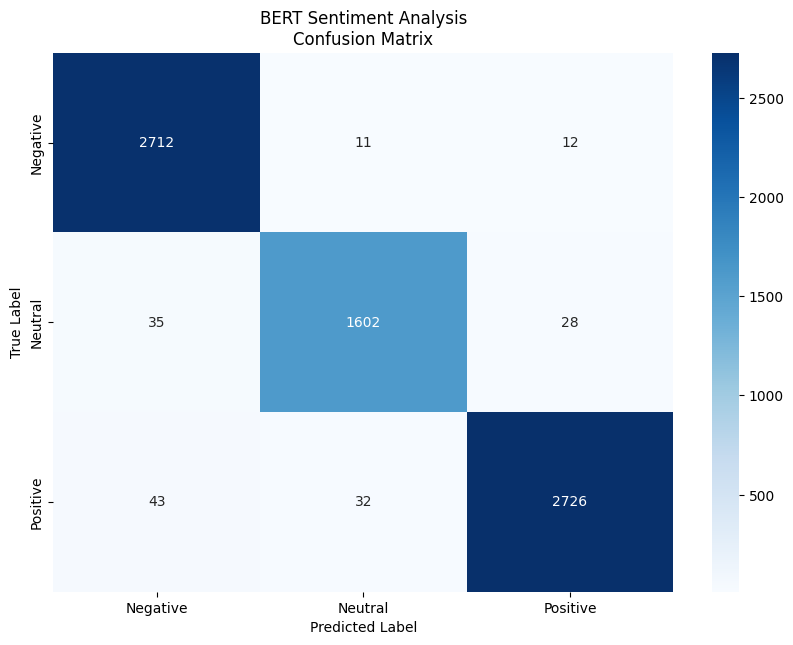

In [135]:
# Plotting using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('BERT Sentiment Analysis\nConfusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [140]:
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # Checks if y_test is one-hot encoded
    y_test = y_test.argmax(axis=1)


In [142]:
print('\tClassification Report for RoBERTa:\n\n', classification_report(y_test, y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))


	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.97      0.99      0.98      2735
     Neutral       0.97      0.96      0.97      1665
    Positive       0.99      0.97      0.98      2801

    accuracy                           0.98      7201
   macro avg       0.98      0.98      0.98      7201
weighted avg       0.98      0.98      0.98      7201

